In [1]:
import math
import numpy as np

In [2]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [3]:
import initdat

In [4]:

rad0=50
ecc0=0.5
theta0= 0. #math.pi/6. #math.pi/6.
mass0=1.0
initdateqellipse=initdat.InitialDataEqualMassConic(rad0,ecc0,theta0,mass0)
print(initdateqellipse)

angle 0.0
0.5
(array([3.14159265, 0.        ]), 0.0, 50, 0.5, array([1., 1.]))


VERIFIED FOR THETA=-45,45,135,180,90,30,-30. VERIFIED FOR ECC =0.001, 0.1,0.5, 0.7, 0.9, 0.95 VERIFIED FOR RAD0=50,75 100 

In [5]:
import getxyuvtwoellipse_apper

In [6]:
useperihelion=True

In [7]:
xyuvaeqellipse=getxyuvtwoellipse_apper.getxyuveqtwoellipses(initdateqellipse,useperihelion)
print(xyuvaeqellipse)
masses,xvec,avec=xyuvaeqellipse

initdat 50 [3.14159265 0.        ] 0.5 [-1.  1.] [1.2246468e-16 0.0000000e+00]
coordsep 50
pi
zero
[-50.  50.]
[0. 0.]
(array([1., 1.]), array([[-25.        ,   0.        ,   0.        ,  -0.        ,
         -0.12247449,   0.        ],
       [ 25.        ,   0.        ,   0.        ,  -0.        ,
          0.12247449,   0.        ]]), array([[ 0.0004, -0.    ,  0.    ],
       [-0.0004, -0.    ,  0.    ]]))


In [8]:
import RK4implicit

In [9]:
import OrbitDiffEq

In [10]:
masses, xvec,avec=xyuvaeqellipse
ODEeq= OrbitDiffEq.OrbitDiffEq(masses,xvec,avec,0.0)
ODEeq.print2D()
ODEeq.print2D()

[1. 1.] [[-25.           0.           0.          -0.          -0.12247449
    0.        ]
 [ 25.           0.           0.          -0.           0.12247449
    0.        ]] 0.0
[1. 1.] [[-25.           0.           0.          -0.          -0.12247449
    0.        ]
 [ 25.           0.           0.          -0.           0.12247449
    0.        ]] 0.0


In [11]:
print(xyuvaeqellipse)

(array([1., 1.]), array([[-25.        ,   0.        ,   0.        ,  -0.        ,
         -0.12247449,   0.        ],
       [ 25.        ,   0.        ,   0.        ,  -0.        ,
          0.12247449,   0.        ]]), array([[ 0.0004, -0.    ,  0.    ],
       [-0.0004, -0.    ,  0.    ]]))


In [12]:
import timestep

In [13]:
numsteps=6000*10
dt=0.1
outputevery=1
nptimes, npstar1x, npstar2x, npstar1a, npstar2a= timestep.timestep(numsteps,dt,xyuvaeqellipse,outputevery)

In [14]:
npstar1x

array([[-2.50000000e+01,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -1.22474487e-01,  0.00000000e+00],
       [-2.49999980e+01, -1.22474484e-02,  0.00000000e+00,
         3.99999973e-05, -1.22474477e-01,  0.00000000e+00],
       [-2.49999920e+01, -2.44948948e-02,  0.00000000e+00,
         7.99999787e-05, -1.22474448e-01,  0.00000000e+00],
       ...,
       [ 6.50765680e+01, -2.58921131e+01,  0.00000000e+00,
         3.01846656e-02,  3.50405295e-02,  0.00000000e+00],
       [ 6.50795863e+01, -2.58886090e+01,  0.00000000e+00,
         3.01799302e-02,  3.50424134e-02,  0.00000000e+00],
       [ 6.50826040e+01, -2.58851046e+01,  0.00000000e+00,
         3.01751950e-02,  3.50442969e-02,  0.00000000e+00]])

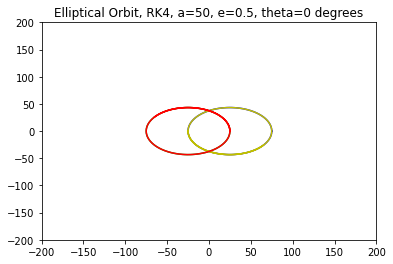

In [15]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

%%html
<a href="https://github.com/sdorsher/ManyBodyProblem/blob/master/EllipseSymmetry.png">Elliptical orbits at thirty degrees with symmetry line</a>
It is clear that the elliptical orbits have focuses, perhelions, and aphelions on the axis of symmetry from this plot. It is also clear that the orbits are symmetric with respect to eachother. 

In [16]:
def getfocus(a,ecc):
    c=a*ecc
    return c

In [17]:
def getsemiminor(a,ecc):
    c=getfocus(a,ecc)
    b=np.sqrt(a**2-c**2)
    return b

In [18]:
def getxtheory2(theta0,ecc0,rad0,t, sgn):
    focus=getfocus(rad0,ecc0)
    b=getsemiminor(rad0,ecc0)
    xdim=rad0
    ydim=b
    xtheory=sgn*focus*np.cos(theta0)+xdim*np.cos(t)*np.cos(theta0)-ydim*np.sin(t)*np.sin(theta0)
    return xtheory

In [19]:
def getytheory2(theta0, ecc0, rad0, t, sgn):
    focus = getfocus(rad0,ecc0)
    b=getsemiminor(rad0,ecc0)
    xdim=rad0
    ydim=b
    ytheory=sgn*focus*np.sin(theta0)+ydim*np.cos(theta0)*np.sin(t)+xdim*np.sin(theta0)*np.cos(t)
    return ytheory



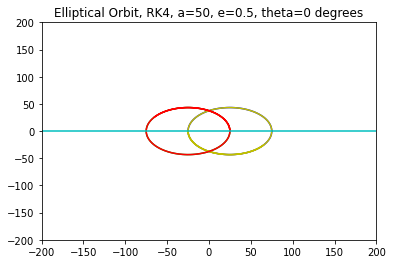

In [20]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

Computed orbit and parametric description of ellipse evolve at different rates, since the parametric description of the ellipse doesn't obey keplers law of equal area in equal time (conservation of angular momentum). This is a problem for the fit below. 

# Conservation of angular momentum

In [21]:
import Lstability

In [22]:
deltaL, Lavg=Lstability.Lstability(npstar1x,npstar2x,mass0)
deltaL, Lavg

(3.1183369646375074e-14, -2.0412414523192806)

Orbit conserves angular momentum to a tolerance of deltaL. 

# Conservation of Energy

In [23]:
import Estability

In [24]:
deltaE, Eavg = Estability.Estability(npstar1x, npstar2x, mass0)
deltaE, Eavg

(1.9347771707844668e-14, -0.0050000000000002065)

Orbit conserves energy to a relative error of deltaE. 

# Symmetry of the two stars orbits with respect to eachother 

In [25]:
import orbitSymmetricTol

In [26]:
allcancelsx, allcancelsa=orbitSymmetricTol.howSymmetric(npstar1x,npstar2x,npstar1a,npstar2a)

In [27]:
allcancelsx

1e-14

Orbit is symmetric with respect to x and v up to a tolerance of allcancelsx

In [28]:
allcancelsa

1e-14

In [29]:
npstar1x

array([[-2.50000000e+01,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -1.22474487e-01,  0.00000000e+00],
       [-2.49999980e+01, -1.22474484e-02,  0.00000000e+00,
         3.99999973e-05, -1.22474477e-01,  0.00000000e+00],
       [-2.49999920e+01, -2.44948948e-02,  0.00000000e+00,
         7.99999787e-05, -1.22474448e-01,  0.00000000e+00],
       ...,
       [ 6.50765680e+01, -2.58921131e+01,  0.00000000e+00,
         3.01846656e-02,  3.50405295e-02,  0.00000000e+00],
       [ 6.50795863e+01, -2.58886090e+01,  0.00000000e+00,
         3.01799302e-02,  3.50424134e-02,  0.00000000e+00],
       [ 6.50826040e+01, -2.58851046e+01,  0.00000000e+00,
         3.01751950e-02,  3.50442969e-02,  0.00000000e+00]])

Orbit is symmetric with respect to a to up to or better than a tolerance of allcancelsa

# Testing for precision in perihelion and aphelion recovery from knowledge of the initial angle

In [30]:
import aeTest

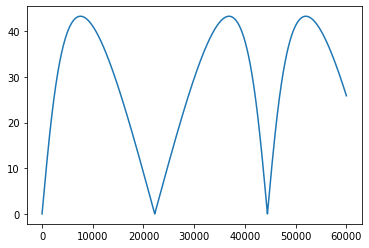

In [31]:
from matplotlib import pyplot as plt
plt.plot( np.abs(npstar1x[:,1]))

In [32]:
def findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion):
    apindex=np.argmin(np.abs(npstar1x[1:,1]))+1
    print(apindex)
    delta=math.floor(.2*apindex)
    print(delta)
    perindex=np.argmin(np.abs(npstar1x[delta:apindex-delta,1]))+delta
    print(perindex)
    print(apindex/perindex)
    if np.abs(apindex/perindex-2.)>0.05: 
        perindex=np.argmin(np.abs(npstar1x[apindex+delta:2*apindex+delta,1]))+delta+apindex
        print(perindex)
        apindex,perindex=perindex,apindex
        print(apindex,perindex)
        print(apindex/perindex)
    #apindex3=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    #apindex4=np.argmin(np.abs(npstar1x[100:apindex3-100,1]))+100
    #perindex=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    if useperihelion:
        apindex,perindex=perindex,apindex
    coordap=[npstar1x[apindex,0],npstar1x[apindex,1]]
    coordper=[npstar1x[perindex,0],npstar1x[perindex,1]]
    ra=np.sqrt(np.sum(np.array(coordap)**2))
    rp=np.sqrt(np.sum(np.array(coordper)**2))
    e=(ra-rp)/(ra+rp)
    a=1./2.*(ra+rp)
    deltae=np.abs(e-ecc0)/ecc0
    deltaa=np.abs(a-rad0)/rad0
    return apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [33]:
if theta0==0:
    apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa=findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion)

22214
4442
17771
1.2500140678633729
44429
44429 22214
2.0000450166561627


In [34]:
if theta0!=0:
    perindex,apindex,coordper,coordap,rp,ra,e,a,deltae,deltaa=aeTest.findPerApHelion(npstar1x,theta0,ecc0,rad0)

Recovered perihelion radius given by r_per, recovered aphelion radius given by r_ap, a is semimajor axis computed from the orbit, e is eccentricty computed from the orbit, delta a is relative error on the semimajor axis, and delta e is eccenticity relative error. 

In [35]:
apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

(22214,
 44429,
 [74.99999996178201, -0.0016929680664632164],
 [-24.999999941777688, -0.002089640329429189],
 74.99999998088961,
 25.00000002910962,
 0.4999999994678037,
 50.00000000499962,
 1.0643925740794202e-09,
 9.999240546676447e-11)

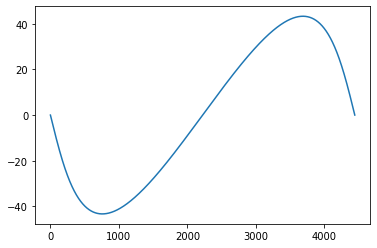

In [36]:
plt.plot(nptimes[:perindex],npstar1x[:perindex,1])

# Testing for symmetry within a given star's orbit about the line created by the initial angle with the origin that should pass thorugh the center of the ellipse, both focuses, and perihelion and aphelion

In [37]:
pivotindex=perindex
endindex = apindex
if useperihelion:
    pivotindex=apindex
    endindex=perindex

In [38]:
tosum1=list(range(0,endindex+1))
tosum2=list(range(endindex+1,pivotindex+1))

In [39]:
len(tosum1)

44430

In [40]:
len(tosum2)

0

In [41]:
apindex,perindex

(22214, 44429)

In [42]:
revtosum2=tosum2.reverse()

In [43]:
xsum=np.zeros(endindex+1)
ysum=np.zeros(endindex+1)
for index in np.arange(0,pivotindex):
    xsum[index]=npstar1x[index,0]+npstar1x[pivotindex+1-index,0]
    ysum[index]=npstar1x[index,1]+npstar1x[pivotindex+1-index,1]

In [44]:
xsum=xsum/2

In [45]:
ysum=ysum/2

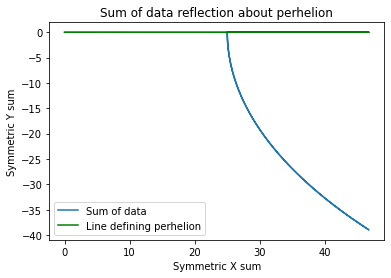

In [46]:
import matplotlib.pyplot as plt
b0=np.tan(theta0)
plt.plot(xsum,ysum,label="Sum of data")
plt.plot(xsum,b0*xsum, color="green", label="Line defining perhelion")
plt.xlabel("Symmetric X sum")
plt.ylabel("Symmetric Y sum")
plt.legend()
plt.title("Sum of data reflection about perhelion")
plt.show()

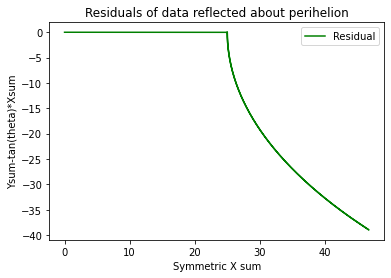

In [47]:
plt.plot(xsum,ysum-np.tan(theta0)*xsum, color="green", label="Residual")
plt.xlabel("Symmetric X sum")
plt.ylabel("Ysum-tan(theta)*Xsum")
plt.title("Residuals of data reflected about perihelion")
plt.legend()
plt.show()

The residual improves substantially from .2 at perihelion with a timestep of dt=1 to .125 at perihelion with a timestep of dt=.3 to .02 at perihelion with a timestep of dt=.1. I think timestep makes all the difference between adjacent pairs of points in resolving perihelion. I think it is difficult to tell how symmetric the orbit is by this method when the limitation is in the resolution of the orbit with timestep. Interpolation would be necessary to get a good picture of orbital shape. 

In the interest of accomplishing further orbital evolutions, I think I'm going to let the precice numerical characterization of orbital shape question go (the predicted and actual orbits overlap quite nicely) and move on to evolving parabolic and hyperbolic orbits. 

# Fit t as a function of the eccentric anomoly (angle from the center of the elipse)

In [48]:
def findEccentricAnomoly(coordap, coordper):
    Ecenter=np.array(coordap)+np.array(coordper)
    Ecenter/=2.
    return Ecenter


In [49]:
ellipsecenter=findEccentricAnomoly(coordap,coordper)

In [50]:
ellipsecenter

array([ 2.5000000e+01, -1.8913042e-03])

In [261]:
def getEllipsecenter(ecc,rad,theta, useperihelion):
    #ind of use perihelion
    rp=-rad*(1-ecc)
    ra=rad*(1+ecc)
    rcent=(rp+ra)/2
    rcentx=-rcent*np.cos(theta)
    rcenty=-rcent* np.sin(theta)
    return [rcentx,rcenty]

In [262]:
(np.array(coordap)+np.array(coordper))/2

array([ 2.5000000e+01, -1.8913042e-03])

In [263]:
getEllipsecenter(ecc0,rad0,theta0, True)

[-25.0, -0.0]

In [264]:
np.arctan2(-1.,0)/math.pi*180

-90.0

In [479]:
def getEang(npstar2x,ecc,rad,theta, useperihelion):
    ellipsecenter=getEllipsecenter(ecc,rad,theta, useperihelion)
    #print(ellipsecenter)
    #print(npstar1x)
    #print(npstar1x[:,0])
    xfortan=npstar2x[:,0]-ellipsecenter[0]
    yfortan=npstar2x[:,1]-ellipsecenter[1]
    #print("xy",xfortan,yfortan)
    Eang=np.arctan2(yfortan,xfortan)
    Eangtheta=2*np.arctan2(np.sqrt(1+ecc)*np.sin(theta/2.),np.sqrt(1-ecc)*np.cos(theta/2.))
    Eang-=Eangtheta
    #if useperihelion:
    #    Eang-=math.pi
    print(len(Eang))
    for i in np.arange(len(Eang)):
        #if xfortan[i]<0:
        #    Eang[i]+=math.pi
        if Eang[i]<0:
            Eang[i]+=2*math.pi
    print(xfortan,yfortan,Eang/math.pi*180)
    print("Eang",Eang)
    return xfortan, yfortan,Eang

In [480]:
np.arctan2(-6.69327422*10**-6, -0.02240526)

-3.1412939168636456

In [481]:
def xofeccanom(rad,Eang,ecc):
    return rad*(np.cos(Eang)+ecc)

In [482]:
def yofeccanom(rad, Eang, ecc):
    b=getsemiminor(rad,ecc)
    return b*np.sin(Eang) 

In [483]:
def tofEccAnom(npstar2x, rad,ecc,theta,mass, useperihelion):
    xE0,yE0,Eang=getEang(npstar2x,ecc,rad,theta, useperihelion)
    b=getsemiminor(rad,ecc)
    #fitval=rad*b*(Eang-ecc*np.sin(Eang))
    sgn=-1
    if useperihelion:
        sgn=+1
    # added a factor of 2 in front of fitval
    fitval=rad**(1.5)*mass**(-.5)*(Eang-sgn*ecc*np.sin(Eang))
    fitval*=2
    print(Eang, ecc,rad,mass,fitval)
    return fitval

In [484]:
def residualtEang(pars,nptimes,npstar2x):
    residual= nptimes-tofEccAnom(npstar2x,pars['rad'],pars['ecc'],pars['theta'],pars['mass'],pars['useperihelion'])
    #print(nptimes, residual)
    return residual

In [485]:
endindex=apindex
if useperihelion:
    endindex=perindex

In [486]:
endindex

44429

In [487]:
xE0,yE0,Eang0=getEang(npstar2x[0:endindex-1,:],ecc0,rad0,theta0, useperihelion)

44428
[50.         49.999998   49.999992   ... 49.99997067 49.99998399
 49.99999331] [ 0.          0.01224745  0.02449489 ... -0.04690014 -0.0346527
 -0.02240526] [0.00000000e+00 1.40345423e-02 2.80690841e-02 ... 3.59946256e+02
 3.59960291e+02 3.59974325e+02]
Eang [0.00000000e+00 2.44948973e-04 4.89897935e-04 ... 6.28224730e+00
 6.28249225e+00 6.28273720e+00]


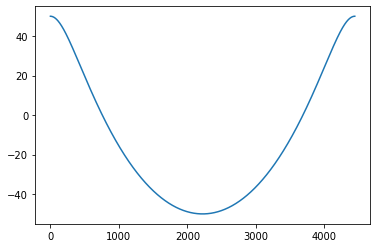

In [488]:
plt.plot(nptimesoneorbit,xE0)

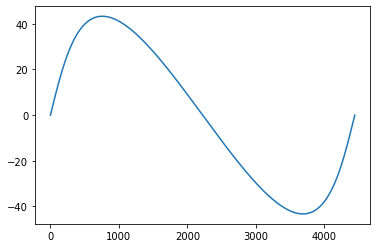

In [489]:
plt.plot(nptimesoneorbit,yE0)

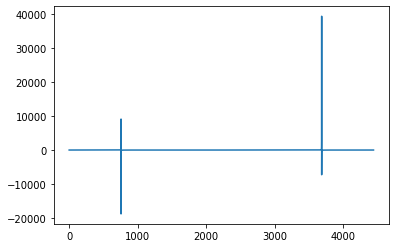

In [490]:
plt.plot(nptimesoneorbit,yE0/xE0)

In [491]:
np.arctan(0./1.)

0.0

In [492]:
yE0[0]

0.0

In [493]:
xE0[0]

50.0

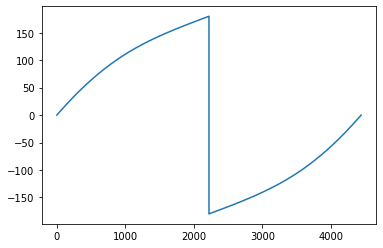

In [494]:
plt.plot(nptimesoneorbit,np.arctan2(yE0,xE0)*180/math.pi)

In [495]:
Eangtest=tofEccAnom(npstar2x[0:endindex-1,:],rad0,ecc0,theta0,masses[0], useperihelion)

44428
[50.         49.999998   49.999992   ... 49.99997067 49.99998399
 49.99999331] [ 0.          0.01224745  0.02449489 ... -0.04690014 -0.0346527
 -0.02240526] [0.00000000e+00 1.40345423e-02 2.80690841e-02 ... 3.59946256e+02
 3.59960291e+02 3.59974325e+02]
Eang [0.00000000e+00 2.44948973e-04 4.89897935e-04 ... 6.28224730e+00
 6.28249225e+00 6.28273720e+00]
[0.00000000e+00 2.44948973e-04 4.89897935e-04 ... 6.28224730e+00
 6.28249225e+00 6.28273720e+00] 0.5 50 1.0 [0.00000000e+00 8.66025407e-02 1.73205083e-01 ... 4.44255130e+03
 4.44263791e+03 4.44272451e+03]


In [496]:
np.max(Eangtest)

4442.724509064325

In [497]:
nptimes[0]

0.0

In [498]:
nptimesoneorbit=nptimes[0:endindex-1]

In [499]:
tpredoneorbit=Eangtest[0:endindex-1]

In [500]:
Eangoneorbit=Eang0[0:endindex-1]

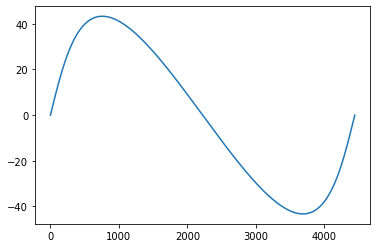

In [501]:
plt.plot(nptimesoneorbit,npstar2x[0:endindex-1,1])

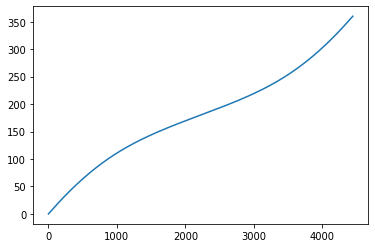

In [502]:
plt.plot(nptimesoneorbit,Eangoneorbit/math.pi*180)

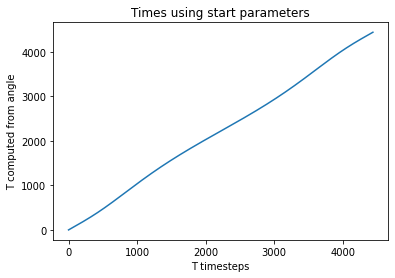

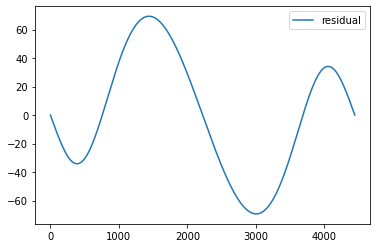

In [519]:
plt.plot(nptimesoneorbit,tpredoneorbit, label='times')
plt.xlabel("T timesteps")
plt.ylabel("T computed from angle")
plt.title("Times using start parameters")
plt.show()
plt.plot(nptimesoneorbit,tpredoneorbit-nptimesoneorbit, label='residual')
plt.legend()
plt.show()


Range of output is wrong: arctan2 is only giving output in range of pi, not 2 pi. Also need to fix perihelion start so that it doesn't have branch cut. 

In [504]:
from matplotlib import pyplot as plt

Arctan function is giving tangent output. I'm done for today. I'm asking for help on this, either Steve or on a forum. Clearly something really weird is going on. This is a distinct problem from the retrograde motion I had before I fixed the center, which you can tell from the sharply spiked top as opposed to the curved top I had before. Now the center appears to be in the correct location but there is some problem related to tangent versus arctangent. 

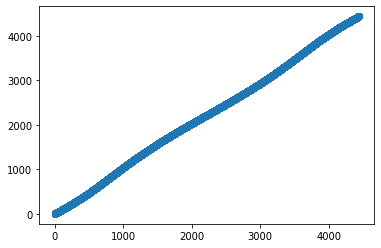

In [505]:
plt.scatter(nptimesoneorbit,tpredoneorbit)

Retrograde motion as seen from the center of mass. I'm not sure that makes sense. So there's a problem with the definition of the Eang. The problem might be with the ellipse center, which probably shouldn't be at x=-70, if it spans between +5 and -95. 

In [508]:
from lmfit import Minimizer,Parameters
pfittEang = Parameters()
pfittEang.add(name='theta', value=theta0, min=0, max=2.*math.pi, vary=True)
pfittEang.add(name='rad', value=rad0, min=0, vary=True)
pfittEang.add(name='ecc', value=ecc0, min=0, max=1.0, vary=True)
pfittEang.add(name='mass', value=masses[0], vary=False)
pfittEang.add(name='useperihelion', value=True, vary=False)

minit = Minimizer(residualtEang, pfittEang, fcn_args=(nptimesoneorbit,npstar2x[:endindex-1,:]))

outt = minit.leastsq()

44428
[50.         49.999998   49.999992   ... 49.99997067 49.99998399
 49.99999331] [ 0.          0.01224745  0.02449489 ... -0.04690014 -0.0346527
 -0.02240526] [0.00000000e+00 1.40345423e-02 2.80690841e-02 ... 3.59946256e+02
 3.59960291e+02 3.59974325e+02]
Eang [0.00000000e+00 2.44948973e-04 4.89897935e-04 ... 6.28224730e+00
 6.28249225e+00 6.28273720e+00]
[0.00000000e+00 2.44948973e-04 4.89897935e-04 ... 6.28224730e+00
 6.28249225e+00 6.28273720e+00] <Parameter 'ecc', value=0.5, bounds=[0:1.0]> <Parameter 'rad', value=50.0, bounds=[0:inf]> <Parameter 'mass', value=1.0 (fixed), bounds=[-inf:inf]> [0.00000000e+00 8.66025407e-02 1.73205083e-01 ... 4.44255130e+03
 4.44263791e+03 4.44272451e+03]
44428
[50.         49.999998   49.999992   ... 49.99997067 49.99998399
 49.99999331] [ 0.          0.01224745  0.02449489 ... -0.04690014 -0.0346527
 -0.02240526] [0.00000000e+00 1.40345423e-02 2.80690841e-02 ... 3.59946256e+02
 3.59960291e+02 3.59974325e+02]
Eang [0.00000000e+00 2.44948973e-04 

In [509]:
outt

Eccentricity fit is still not great for eccentricity of 0.9 (0.99), but radius fit is pretty good. The chi square is enormous. Eccentricity of 0.5 looks somewhat better (ecc 0.51) but still has a large chisquared and generates a potentially helpful divide by zero warning in the fit. 

Updated Jupyter and python packages and angular momentum and energy conservation improved by many orders of magnitude, but the fit is about the same. deltaL and deltaE are now consistent with roundoff error. 